<a href="https://colab.research.google.com/github/NehaKumari500092077/Image-Processing/blob/main/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

IMAGE_SIZE = [224, 224]

In [38]:
#Give dataset path
train_path = '/content/drive/MyDrive/Dataset/SkinCancer/train'
test_path = '/content/drive/MyDrive/Dataset/SkinCancer/test'

Working with 1440 images
Image examples: 
604.jpg


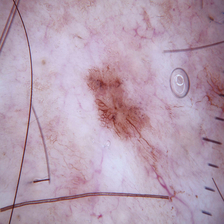

1435.jpg


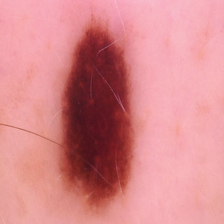

1390.jpg


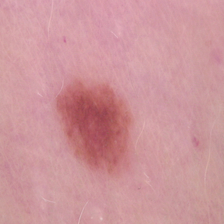

1347.jpg


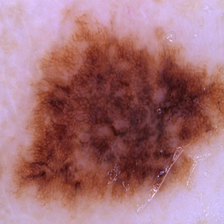

638.jpg


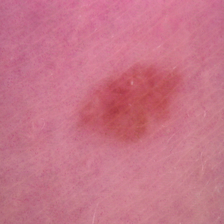

1421.jpg


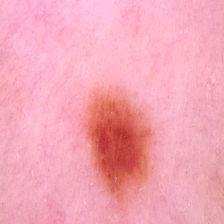

1353.jpg


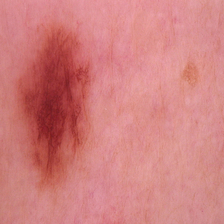

837.jpg


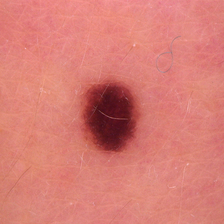

189.jpg


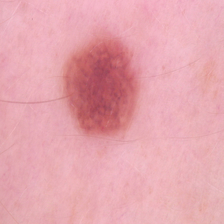

77.jpg


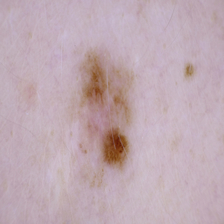

In [39]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/benign'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [40]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [41]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [42]:
for layer in vgg.layers:
  layer.trainable = False

In [43]:
folders = glob('/content/drive/MyDrive//Dataset/SkinCancer/train/*')
print(len(folders))

2


In [44]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [45]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [46]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [47]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [48]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 2637 images belonging to 2 classes.


In [49]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 660 images belonging to 2 classes.


In [50]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10



Epoch 1: val_loss improved from inf to 1.96314, saving model to mymodel.h5
5/5 - 345s - loss: 2.6519 - accuracy: 0.6313 - val_loss: 1.9631 - val_accuracy: 0.8045 - 345s/epoch - 69s/step
Epoch 2/10


5/5 - 31s - loss: 1.7823 - accuracy: 0.8125 - 31s/epoch - 6s/step
Epoch 3/10


5/5 - 30s - loss: 2.2523 - accuracy: 0.7812 - 30s/epoch - 6s/step
Epoch 4/10


5/5 - 20s - loss: 2.0014 - accuracy: 0.8014 - 20s/epoch - 4s/step
Epoch 5/10


5/5 - 22s - loss: 2.0736 - accuracy: 0.8188 - 22s/epoch - 4s/step
Epoch 6/10


5/5 - 24s - loss: 1.8498 - accuracy: 0.8250 - 24s/epoch - 5s/step
Epoch 7/10


5/5 - 19s - loss: 2.1870 - accuracy: 0.7875 - 19s/epoch - 4s/step
Epoch 8/10


5/5 - 22s - loss: 2.2140 - accuracy: 0.7375 - 22s/epoch - 4s/step
Epoch 9/10


5/5 - 21s - loss: 1.7149 - accuracy: 0.7688 - 21s/epoch - 4s/step
Epoch 10/10


5/5 - 17s - loss: 2.0780 - accuracy: 0.8125 - 17s/epoch - 3s/step
Training completed in time:  0:10:27.489669


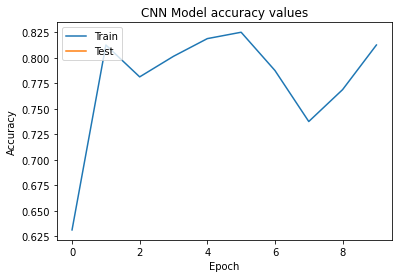

In [51]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()